In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [3]:
df = pd.read_csv(r"A:\CO2 Emissions.csv")

In [7]:
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [9]:
df.isna().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(1103)

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.drop(['Make', 'Model', 'Vehicle Class'], axis=1, inplace=True)

In [12]:
df.head()

,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [13]:
if 'Fuel Type' in df.columns:
    le = LabelEncoder()
    df['Fuel Type'] = le.fit_transform(df['Fuel Type'])

In [14]:
df.head()

,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,2.0,4,AS5,4,9.9,6.7,8.5,33,196
1,2.4,4,M6,4,11.2,7.7,9.6,29,221
2,1.5,4,AV7,4,6.0,5.8,5.9,48,136
3,3.5,6,AS6,4,12.7,9.1,11.1,25,255
4,3.5,6,AS6,4,12.1,8.7,10.6,27,244


In [15]:
df.drop('Transmission', axis = 1, inplace = True)

In [16]:
df.head()

,Engine Size(L),Cylinders,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,2.0,4,4,9.9,6.7,8.5,33,196
1,2.4,4,4,11.2,7.7,9.6,29,221
2,1.5,4,4,6.0,5.8,5.9,48,136
3,3.5,6,4,12.7,9.1,11.1,25,255
4,3.5,6,4,12.1,8.7,10.6,27,244


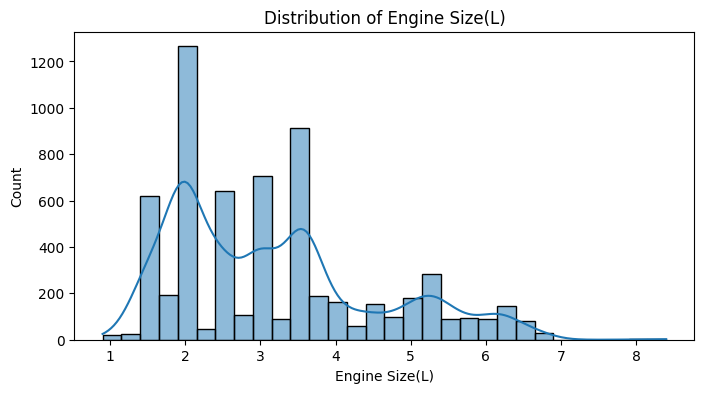

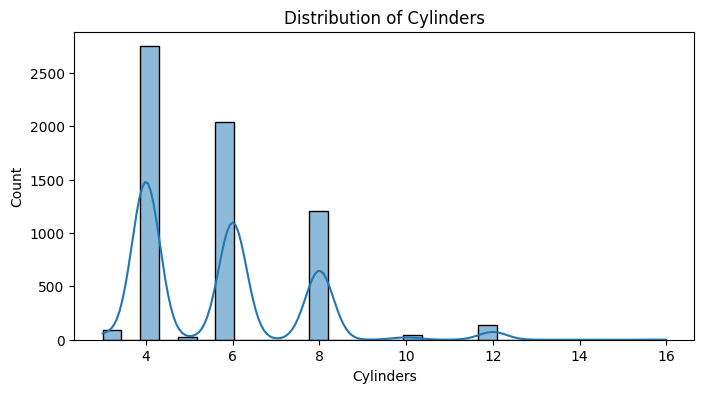

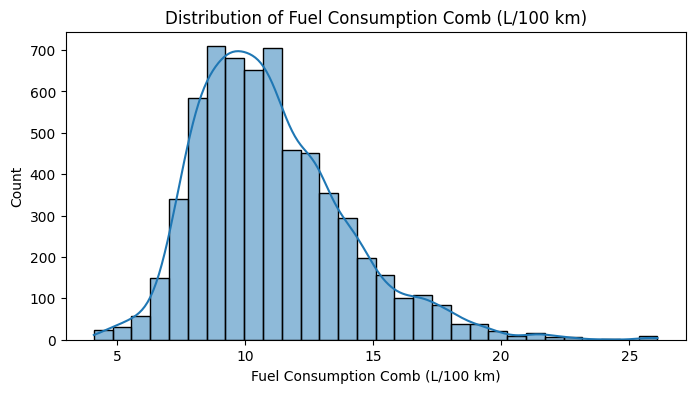

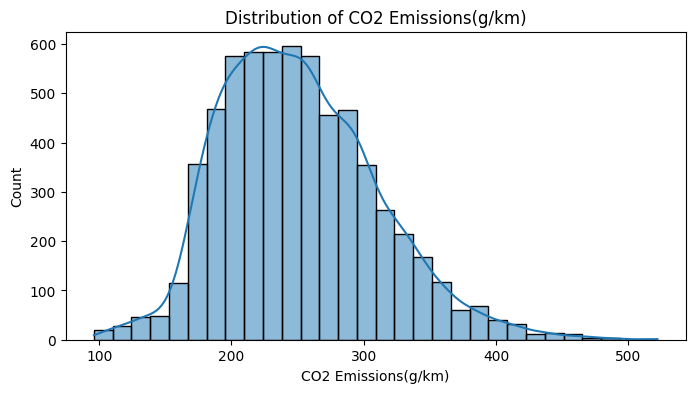

In [17]:
for col in ['Engine Size(L)', 'Cylinders', 'Fuel Consumption Comb (L/100 km)', 'CO2 Emissions(g/km)']:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()

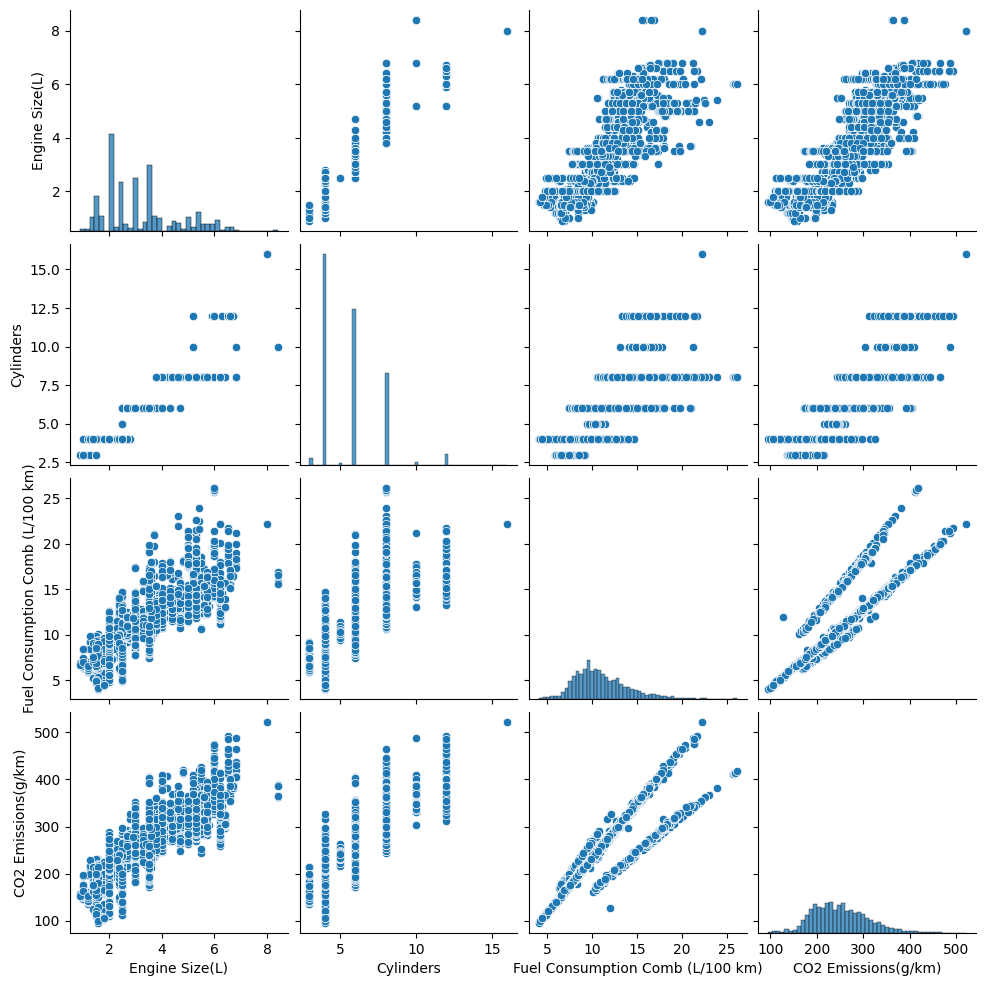

In [18]:
sns.pairplot(df[['Engine Size(L)', 'Cylinders', 'Fuel Consumption Comb (L/100 km)', 'CO2 Emissions(g/km)']])
plt.show()

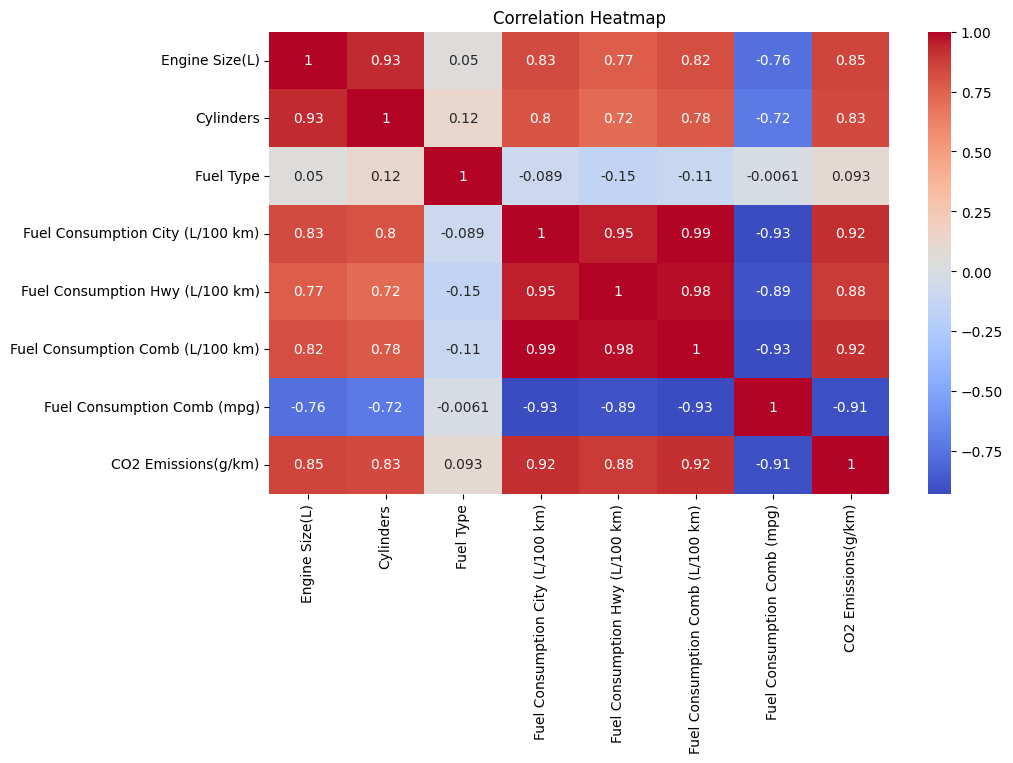

In [19]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [20]:
features = ['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)',
            'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
            'Fuel Type']
target = 'CO2 Emissions(g/km)'

In [21]:
X = df[features]
y = df[target]

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42)
}

In [40]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [41]:
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("🔍 Random Forest Performance:")
print(f"MAE  : {mae_rf:.2f}")
print(f"MSE  : {mse_rf:.2f}")
print(f"RMSE : {rmse_rf:.2f}")
print(f"R²   : {r2_rf:.4f}")

🔍 Random Forest Performance:
MAE  : 1.97
MSE  : 9.11
RMSE : 3.02
R²   : 0.9975


In [42]:
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

In [43]:
# XGBoost metrics
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("🔍 XGBoost Performance:")
print(f"MAE  : {mae_xgb:.2f}")
print(f"MSE  : {mse_xgb:.2f}")
print(f"RMSE : {rmse_xgb:.2f}")
print(f"R²   : {r2_xgb:.4f}")

🔍 XGBoost Performance:
MAE  : 2.12
MSE  : 10.36
RMSE : 3.22
R²   : 0.9971


In [24]:
results = {}

In [25]:
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    
    results[name] = {
        "MAE": mean_absolute_error(y_test, preds),
        "MSE": mean_squared_error(y_test, preds),
        "RMSE": np.sqrt(mean_squared_error(y_test, preds)),
        "R2": r2_score(y_test, preds),
        "preds": preds
    }

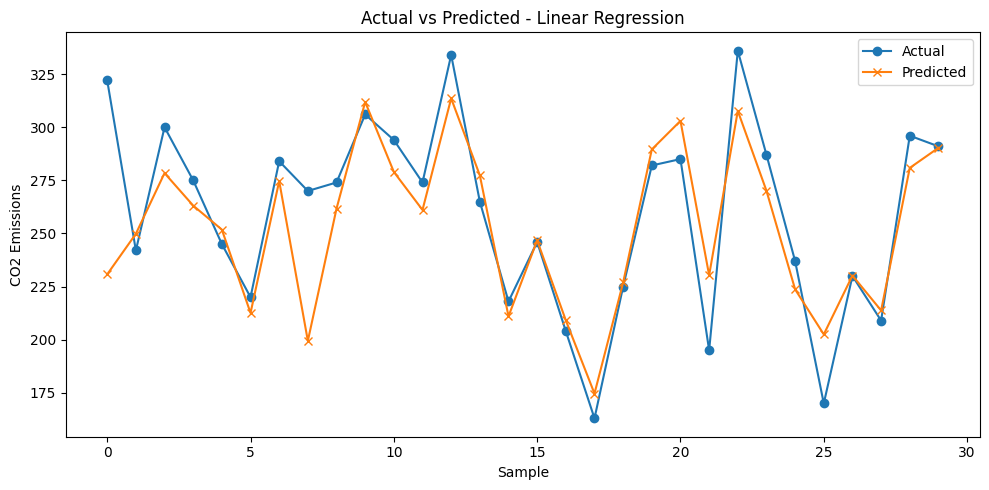

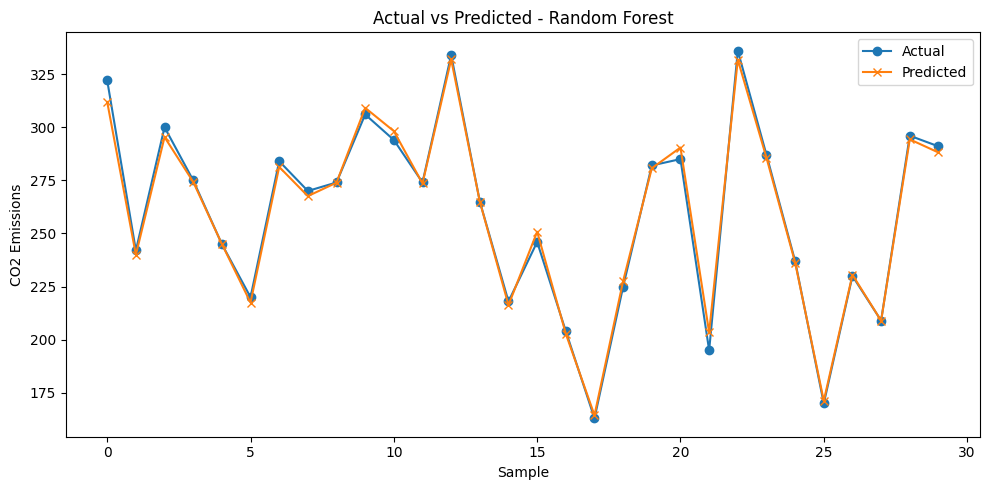

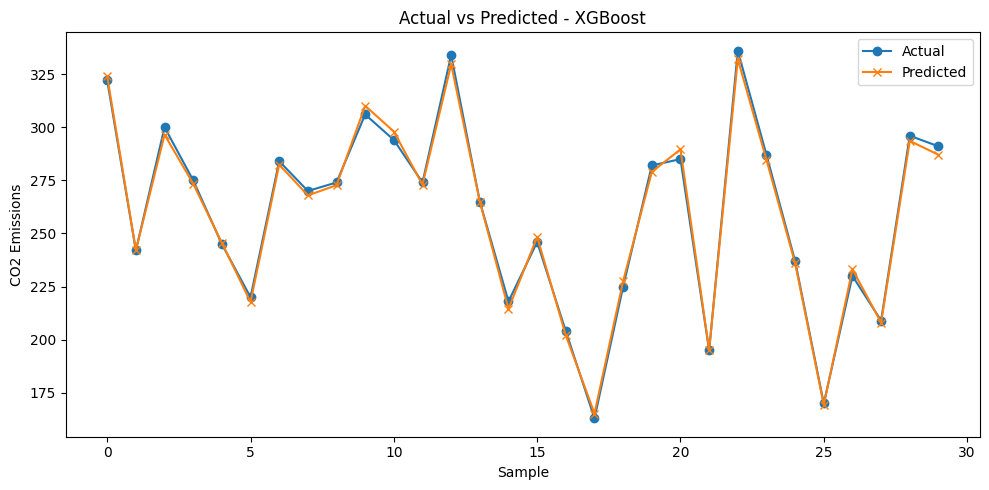

In [26]:
for name, result in results.items():
    plt.figure(figsize=(10, 5))
    plt.plot(y_test.values[:30], label='Actual', marker='o')
    plt.plot(result["preds"][:30], label='Predicted', marker='x')
    plt.title(f'Actual vs Predicted - {name}')
    plt.xlabel("Sample")
    plt.ylabel("CO2 Emissions")
    plt.legend()
    plt.tight_layout()
    plt.show()

In [34]:
metrics_df = pd.DataFrame({
    model: {
        'MAE': res['MAE'],
        'MSE': res['MSE'],
        'RMSE': res['RMSE'],
        'R2': res['R2']
    } for model, res in results.items()
})

In [35]:
import IPython.display as display
display.display(metrics_df)

,Linear Regression,Random Forest,XGBoost
MAE,13.425211,1.968788,2.123546
MSE,381.638474,9.110953,10.362625
RMSE,19.535569,3.018436,3.219103
R2,0.894246,0.997475,0.997128


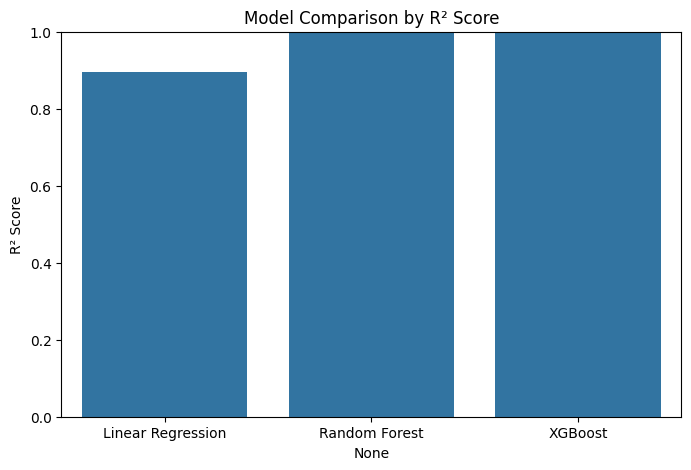

In [38]:
metrics_df_T = metrics_df.T

plt.figure(figsize=(8, 5))
sns.barplot(x=metrics_df_T.index, y=metrics_df_T['R2'])
plt.title("Model Comparison by R² Score")
plt.ylabel("R² Score")
plt.ylim(0, 1)
plt.show()